# Importing libaries and data cleaning

### Step 1: Import necessary libraries

- **load_dataset from datasets** – used to load the `mobilerec` dataset directly from Hugging Face, which provides both app interaction data and app metadata.
- **pandas (`pd`)** – essential for loading, manipulating, cleaning, and analyzing structured data in DataFrames.
- **matplotlib.pyplot (`plt`)** – used to create static visualizations such as bar plots, histograms, and line charts.
- **matplotlib.ticker (`mticker`)** – allows advanced control over axis tick formatting (e.g., thousands separator, custom tick labels).
- **re** – provides regular expression matching operations for advanced text cleaning and pattern recognition.
- **numpy (`np`)** – used for fast numerical operations and handling arrays/matrices efficiently.
- **fasttext** – used to detect the language of app reviews using a pre-trained model (efficient and accurate for large datasets).
- **urllib.request** – allows downloading external files or resources via HTTP (e.g., downloading model files).
- **tqdm** – adds progress bars to loops, especially useful when loading, cleaning, or processing large datasets.
- **seaborn (`sns`)** – built on top of matplotlib; used for more attractive and statistically informative visualizations.
- **pd.set_option('display.max_columns', None)** – configures pandas to display all columns when printing DataFrames (no truncation).

In [5]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import re
import numpy as np
import fasttext
import urllib.request
from tqdm import tqdm
import seaborn as sns
import matplotlib.ticker as mticker
pd.set_option('display.max_columns', None)

---
### Step 2: Load and Prepare the Datasets

- I loaded two datasets from Hugging Face:
  - **`interactions`** – contains user reviews and engagement metrics.
  - **`app_meta`** – contains metadata about the apps such as name, developer, category, and ratings.

- I converted both datasets into pandas DataFrames using `.to_pandas()`.

- Immediately after loading, I created separate **clean working copies** of both datasets:
  - `interactions_df_clean` – clean copy of user interactions
  - `meta_df_clean` – clean copy of app metadata


In [6]:
mbr_data = load_dataset('recmeapp/mobilerec', data_dir='interactions')
mbr_meta = load_dataset('recmeapp/mobilerec', data_dir='app_meta')

interactions_df = mbr_data['train'].to_pandas()
meta_df = mbr_meta['train'].to_pandas()

interactions_df.to_csv('../Data/Raw/mobilerec_interactions.csv', index=False)
meta_df.to_csv('../Data/Raw/mobilerec_metadata.csv', index=False)

In [7]:
interactions_df_clean = interactions_df.copy()
meta_df_clean = meta_df.copy()

---
### Step 3: First Look at the Data

To get a basic understanding of the datasets' structure, column types, and the kind of information I will be working with during exploratory data analysis (EDA), I displayed the first 5 rows of both cleaned datasets:

- `interactions_df_clean` – contains user reviews and interaction data
- `meta_df_clean` – contains app-level metadata such as name, category, developer, rating, and price

In [8]:
display(interactions_df_clean.head())
display(meta_df_clean.head())

,app_package,review,rating,votes,date,uid,formated_date,unix_timestamp,app_category
0,com.cleverapps.heroes,It's really a fun game,5,1,"October 21, 2018",shqoc6X1fcJRLEmx,2018-10-21,1.540094e+09,Casual
1,com.bodyfast,uninstalling. it was ok but felt like it was c...,2,0,"January 18, 2019",shqoc6X1fcJRLEmx,2019-01-18,1.547788e+09,Health & Fitness
2,com.thrivegames.wordshapes,Love this game,4,1,"January 16, 2021",shqoc6X1fcJRLEmx,2021-01-16,1.610773e+09,Word
3,com.affinity.rewarded_play,Doesn't update play time. Just downloaded it 3...,1,1,"November 4, 2021",shqoc6X1fcJRLEmx,2021-11-04,1.635998e+09,Entertainment
4,dating.inmessage.net,app crashes every time I try to log in. what g...,1,0,"November 24, 2021",shqoc6X1fcJRLEmx,2021-11-24,1.637730e+09,Dating


,app_package,app_name,developer_name,app_category,description,content_rating,num_reviews,price,avg_rating
0,com.natewren.lines,Lines Pro - Icon Pack,Nate Wren Design,Personalization,Lines icons (pro version) are outlined shapes ...,Everyone,"2,997",$1.99 Buy,4.7
1,com.capitalone.credittracker,CreditWise from Capital One,"Capital One Services, LLC",Finance,Know your credit score and much more\n\nCapita...,Everyone,"94,914",Install,4.7
2,com.purascents.android,Pura - Smart Fragrance Dispenser,Pura,House & Home,Pura is a smart home fragrance device that you...,Everyone,778,Install,4.4
3,com.wallethub.mywallet,"WalletHub - Free Credit Score, Report & Monito...",WalletHub,Finance,WalletHub is the first app to offer 100% free ...,Everyone,"7,025",Install,4.7
4,air.com.samuramu.gg.se,#SelfLove (GG Confidence & Self esteem),Ggtude Ltd,Medical,Wish to build confidence and have higher self ...,Everyone,625,Install,4.1


---
### Step 4: Drop Irrelevant Columns and Fix Date Format

In this step, I performed two key data cleaning actions to simplify and standardize the datasets:

1. **Dropped redundant or unnecessary columns**  
   - Removed the `date` column: it was a string version of the date and not suitable for time-based operations.  
   - Removed the `unix_timestamp` column: it held the same information in a less readable format.  

2. **Standardized the date format**  
   - Converted the `formated_date` column into a proper datetime format using `pd.to_datetime()` with the format `'%Y-%m-%d'`.  
   - Renamed the column to `date (yyyy-mm-dd)` for clarity.

In [9]:
display(interactions_df_clean.info(show_counts=True))
print()
display(meta_df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19297019 entries, 0 to 19297018
Data columns (total 9 columns):
 #   Column          Non-Null Count     Dtype  
---  ------          --------------     -----  
 0   app_package     19297019 non-null  object 
 1   review          19295813 non-null  object 
 2   rating          19297019 non-null  int64  
 3   votes           19297019 non-null  int64  
 4   date            19297019 non-null  object 
 5   uid             19297019 non-null  object 
 6   formated_date   19297019 non-null  object 
 7   unix_timestamp  19297019 non-null  float64
 8   app_category    19297019 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.3+ GB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_package     10173 non-null  object 
 1   app_name        10173 non-null  object 
 2   developer_name  10173 non-null  object 
 3   app_category    10173 non-null  object 
 4   description     10173 non-null  object 
 5   content_rating  10173 non-null  object 
 6   num_reviews     10173 non-null  object 
 7   price           10173 non-null  object 
 8   avg_rating      10173 non-null  float64
dtypes: float64(1), object(8)
memory usage: 715.4+ KB


None

In [10]:
interactions_df_clean.drop(columns=['date', 'unix_timestamp'], inplace=True)

In [11]:
interactions_df_clean['formated_date'] = pd.to_datetime(interactions_df_clean['formated_date'], format='%Y-%m-%d')
interactions_df_clean.rename(columns={'formated_date': 'date(yyyy-mm-dd)'}, inplace=True)

In [12]:
meta_df_clean["num_reviews"] = meta_df_clean["num_reviews"].str.replace(",", "").astype(int)

---
### Step 5: Convert Columns to Categorical to Save Memory

To optimize memory usage, I analyzed columns with a limited number of unique values and converted them to the **`category`** data type.

- Columns like `app_category` and `content_rating` have a relatively small number of distinct values compared to the total dataset size.
- Converting these columns from `object` to `category` helps **reduce memory usage significantly** and also improves performance in operations like `.groupby()`, filtering, and merging.

After applying this optimization, memory usage dropped from **2.0 GB to 1.6 GB**, achieving a **20% reduction** in memory consumption.

In [13]:
print("Unique 'app_category(interactions data)' values:", interactions_df_clean["app_category"].unique())
print()
print("Unique 'content_rating' values:", meta_df_clean["content_rating"].unique())
print()
print("Unique 'content_rating(meta data)' values:", meta_df_clean["app_category"].unique())

Unique 'app_category(interactions data)' values: ['Casual' 'Health & Fitness' 'Word' 'Entertainment' 'Dating' 'Shopping'
 'Education' 'Business' 'Libraries & Demo' 'Weather' 'Puzzle'
 'Personalization' 'Simulation' 'Maps & Navigation' 'Action'
 'Role Playing' 'Productivity' 'Sports' 'Communication' 'Tools' 'Beauty'
 'Educational' 'Photography' 'Board' 'Music & Audio' 'Finance'
 'Books & Reference' 'Lifestyle' 'Strategy' 'Racing' 'Trivia' 'Parenting'
 'Arcade' 'Adventure' 'Travel & Local' 'Card' 'Casino'
 'Video Players & Editors' 'Food & Drink' 'Medical' 'Comics'
 'News & Magazines' 'Music' 'Social' 'Events' 'Art & Design'
 'House & Home' 'Auto & Vehicles']

Unique 'content_rating' values: ['Everyone' 'Teen' 'Mature 17+' 'Everyone 10+' 'Adults only 18+']

Unique 'content_rating(meta data)' values: ['Personalization' 'Finance' 'House & Home' 'Medical' 'Libraries & Demo'
 'Entertainment' 'Books & Reference' 'Action' 'Weather' 'Business'
 'Dating' 'Productivity' 'Tools' 'Food & Drink' 'Sh

In [14]:
interactions_df_clean["app_category"] = interactions_df_clean["app_category"].astype("category")
meta_df_clean["app_category"] = meta_df_clean["app_category"].astype("category")
meta_df_clean["content_rating"] = meta_df_clean["content_rating"].astype("category")
meta_df_clean["app_name"] = meta_df_clean["app_name"].astype("category")
meta_df_clean["developer_name"] = meta_df_clean["developer_name"].astype("category")

---
### Step 6: Clean the `price` Column

The original `price` column contained messy string values such as:

- `'Install'`
- `'$4.99 Buy'`
- `'$4.99 $1.99 Buy'`
- `'not found'`
- `'$0.99 Install'`

These formats were inconsistent and not usable for numeric analysis.

### Cleaning Rules Applied:
- `'Install'` → converted to `0.00`  
- `'$X Buy'` → converted to numeric **float** (e.g., `'$2.49 Buy'` → `2.49`)
- `'$X $Y Buy'` → extracted both prices and converted the **smaller** one to float (e.g., `'$4.99 $1.99 Buy'` → `1.99`)
- `'$X Install'` → converted to float value (e.g., `'$0.99 Install'` → `0.99`)
- `'not found'` → converted to `NaN`

All cleaned values were stored in a new column `price_clean`, which was explicitly cast to `float` to ensure numeric consistency.  
After confirming the transformation was successful, the original `price` column was dropped from the dataset to eliminate redundancy and free up memory.

In [15]:
meta_df_clean["price"].unique()

array(['$1.99 Buy', 'Install', '$7.99 Buy', '$0.99 Buy', '$24.99 Buy',
       '$4.99 Buy', '$2.99 Buy', '$2.50 Buy', '$4.62 Buy', '$9.99 Buy',
       '$3.99 Buy', '$5.49 Buy', '$6.99 Buy', '$1.49 Buy', '$3.85 Buy',
       '$1.39 Buy', '$14.99 Buy', '$5.99 Buy', '$8.99 Buy', '$2.49 Buy',
       '$1.95 Buy', '$15.99 Buy', '$3.49 Buy', '$29.99 Buy', '$4.49 Buy',
       '$2.79 Buy', '$27.99 Buy', '$1.86 Buy', '$8.49 Buy',
       '$0.99 Install', '$18.99 Buy', '$12.99 Buy', '$0.49 Buy',
       '$33.99 Buy', '$11.99 Buy', '$1.59 Buy', '$9.49 Buy', '$0.89 Buy',
       '$10.99 Buy', '$4.00 Buy', '$9.95 Buy', '$1.99 Install',
       '$3.49 $1.99 Buy', '$3.75 Buy', '$13.99 Buy', '$6.49 Buy',
       '$1.29 Buy', '$1.79 Buy', '$4.95 Buy', '$34.99 Buy', '$3.01 Buy',
       '$3.95 Buy', '$10.00 Buy', '$4.69 Buy', '$9.00 Buy', '$1.09 Buy',
       '$49.00 Buy', '$3.90 Buy', '$1.99 $0.49 Buy', '$19.99 Buy',
       '$9.99 Install', '$7.49 Buy', '$8.99 $6.29 Buy', '$3.33 Buy',
       '$3.00 Buy', '$0.99 

In [17]:
def clean_price(value):
    if value.strip().lower() == "install":
        return 0.00
    if value.strip().lower() == "not found":
        return np.nan
    matches = re.findall(r'\$\d+\.\d{2}', value)
    
    if matches:
        float_prices = [float(price.replace('$', '')) for price in matches]
        return min(float_prices)
    return np.nan

meta_df_clean["price_clean"] = meta_df_clean["price"].apply(clean_price)

In [18]:
meta_df_clean["price_clean"].unique()

array([ 1.99,  0.  ,  7.99,  0.99, 24.99,  4.99,  2.99,  2.5 ,  4.62,
        9.99,  3.99,  5.49,  6.99,  1.49,  3.85,  1.39, 14.99,  5.99,
        8.99,  2.49,  1.95, 15.99,  3.49, 29.99,  4.49,  2.79, 27.99,
        1.86,  8.49, 18.99, 12.99,  0.49, 33.99, 11.99,  1.59,  9.49,
        0.89, 10.99,  4.  ,  9.95,  3.75, 13.99,  6.49,  1.29,  1.79,
        4.95, 34.99,  3.01,  3.95, 10.  ,  4.69,  9.  ,  1.09, 49.  ,
        3.9 , 19.99,  7.49,  6.29,  3.33,  3.  , 17.99, 64.99, 67.5 ,
        0.79,  1.19, 99.99,  2.  ,   nan])

In [19]:
meta_df_clean.drop(columns=['price'], inplace=True)

---
### Step 7: Check for Duplicates and null values
I checked for any duplicate rows and nulls to ensure the dataset doesn’t contain redundant entries and too many null values.

In [21]:
print("Duplicate rows:", interactions_df_clean.duplicated().sum())
print()
print("Features with missing values:")
display(interactions_df_clean.isnull().sum())

Duplicate rows: 0

Features with missing values:


app_package            0
review              1206
rating                 0
votes                  0
uid                    0
date(yyyy-mm-dd)       0
app_category           0
dtype: int64

In [22]:
print("Duplicate rows:", meta_df_clean.duplicated().sum())
print()
print("Features with missing values:")
display(meta_df_clean.isnull().sum())

Duplicate rows: 0

Features with missing values:


app_package       0
app_name          0
developer_name    0
app_category      0
description       0
content_rating    0
num_reviews       0
avg_rating        0
price_clean       3
dtype: int64

Just to be sure, I decided to check what percentage of rows contain missing values in key columns. This helps identify potential issues before aggregation or modeling.

In [23]:
print(f"Interactions data missing reviews: {interactions_df_clean['review'].isna().mean() * 100:.2f}%")
print(f"Metadata missing price: {meta_df_clean['price_clean'].isna().mean() * 100:.2f}%")

Interactions data missing reviews: 0.01%
Metadata missing price: 0.03%


Since the number of rows with missing values is very small, I decided to drop them. One of the columns with missing data (price_clean) is a key feature in my upcoming analysis, and removing a small number of rows won’t introduce bias or negatively affect the results.

In [24]:
interactions_df_clean.dropna(inplace=True)
meta_df_clean.dropna(inplace=True)

---
### Step 8: Detecting the Language of Each Review

Since I’m planning to analyze the reviews later (e.g., identify most frequent words, perform sentiment analysis, or topic modeling), it’s important to ensure that I'm analyzing reviews in the correct language.

This step uses `fastText`’s pre-trained language identification model to assign a language code (e.g., `en`, `de`, `fr`) to each review. To improve reliability and avoid misclassification:

- Reviews shorter than a certain threshold (`min_length=20`) are flagged as `'too_short'`
- Predictions below a minimum confidence score (`min_confidence=0.80`) are flagged as `'low_confidence'`
- Any unexpected error is caught and labeled as `'unknown'`

This ensures that downstream analysis focuses only on reviews that are long enough and confidently identified.

The language is stored in a new column: `"review_lang"`

In [25]:
model = fasttext.load_model("../Models/lid.176.bin")

In [26]:
def detect_language(text, min_length=20, min_confidence=0.80):
    try:
        text = text.strip().replace('\n', ' ')
        if len(text) < min_length:
            return 'too_short'
        label, confidence = model.predict(text, k=1)
        label = label[0].replace('__label__', '')
        confidence = confidence[0]
        if confidence < min_confidence:
            return 'low_confidence'
        return label
    except:
        return 'unknown'

In [27]:
tqdm.pandas()
interactions_df_clean["review_lang"] = interactions_df_clean["review"].astype(str).progress_apply(detect_language).astype("category")

100%|███████████████████████████| 19295813/19295813 [02:05<00:00, 154333.60it/s]


---
### Step 9: Validate and Recalculate Review Counts and Average Ratings

At this stage, I wanted to **cross-verify** whether the values in the original dataset - the `num_reviews` and `avg_rating` accurately reflect what can be calculated from the user interaction data.

**1. Recalculate Total Number of Reviews per App**

In [28]:
df_check_reviews = interactions_df_clean.groupby("app_package").size().reset_index(name="calculated_num_reviews")

review_mismatch = (
    meta_df_clean[["app_package", "num_reviews"]].drop_duplicates()
    .merge(df_check_reviews, on="app_package", how="left")
)

review_mismatch["match"] = review_mismatch["num_reviews"] == review_mismatch["calculated_num_reviews"]

review_mismatch[~review_mismatch["match"]]

,app_package,num_reviews,calculated_num_reviews,match
0,com.natewren.lines,2997,844,False
1,com.capitalone.credittracker,94914,4031,False
2,com.purascents.android,778,433,False
3,com.wallethub.mywallet,7025,1733,False
4,air.com.samuramu.gg.se,625,143,False
...,...,...,...,...
10165,com.unysyegor.effects.neon.magicslate,0,62,False
10166,com.romancestories.novel,2591,354,False
10167,com.cornerdesk.gfx.nstate,226,91,False
10168,com.picture.magic.imager,2724,978,False


**2. Recalculate Average Rating per App**

In [29]:
df_check_rating = interactions_df_clean.groupby("app_package")["rating"].mean().reset_index(name="calculated_avg_rating")

rating_mismatch = (
    meta_df_clean[["app_package", "avg_rating"]].drop_duplicates()
    .merge(df_check_rating, on="app_package", how="left")
)

rating_mismatch["match"] = rating_mismatch["avg_rating"].round(1) == rating_mismatch["calculated_avg_rating"].round(1)

rating_mismatch[~rating_mismatch["match"]]

,app_package,avg_rating,calculated_avg_rating,match
0,com.natewren.lines,4.7,4.287915,False
1,com.capitalone.credittracker,4.7,3.155048,False
2,com.purascents.android,4.4,3.759815,False
3,com.wallethub.mywallet,4.7,4.429313,False
5,com.booster.gfx,4.5,4.281120,False
...,...,...,...,...
10165,com.unysyegor.effects.neon.magicslate,0.0,4.774194,False
10166,com.romancestories.novel,4.9,4.816384,False
10167,com.cornerdesk.gfx.nstate,1.0,1.395604,False
10168,com.picture.magic.imager,4.4,3.605317,False


**3. Merge the Calculated Columns into the interactions DataFrame (for future analysis)**

In [30]:
df_num_reviews = interactions_df_clean.groupby("app_package").size().reset_index(name="calculated_num_reviews")

df_avg_rating = (
    interactions_df_clean.groupby("app_package")["rating"]
    .mean()
    .round(1)
    .reset_index(name="calculated_avg_rating")
)

interactions_df_clean = interactions_df_clean.merge(df_num_reviews, on="app_package", how="left")
interactions_df_clean = interactions_df_clean.merge(df_avg_rating, on="app_package", how="left")

---
### Step 10: Feature engineering

To perform a more detailed and meaningful analysis, I engineered several new features that could reveal important behavioral or business patterns:

- **Review Length**  
  Measures the number of characters in each review. This helps analyze whether longer reviews correlate with higher or lower ratings, or detect potential spammy patterns.

- **Rating Deviation**  
  Captures the difference between an individual user’s rating and the average rating of the app. This can highlight controversial reviews or apps that receive mixed feedback.

- **App Age**
    Calculates how long each app has been on the market by measuring the number of days between its first recorded interaction (used as a proxy for app launch) and the latest date in the dataset. This helps assess how review behavior changes over the app’s lifecycle. For example, whether newer apps receive more polarized feedback or older apps accumulate more reviews.

- **Price Type**
    Categorizes apps as either Free or Paid.

- **Price Range**  
Groups apps into labeled price segments (e.g., Free, `<$1`, `$1–5`, etc.) for easier segmentation and comparison.

In [40]:
# Review Length
interactions_df_clean["review_length"] = interactions_df_clean["review"].astype(str).apply(len)

# Rating Deviation
interactions_df_clean = interactions_df_clean.merge(
    meta_df_clean[["app_package", "avg_rating"]],
    on="app_package",
    how="left"
)

interactions_df_clean["avg_rating_difference"] = (
    interactions_df_clean["avg_rating"] - interactions_df_clean["calculated_avg_rating"]
)

interactions_df_clean = interactions_df_clean.drop(columns=["avg_rating"])

# App Age
max_date = interactions_df_clean["date(yyyy-mm-dd)"].max()
interactions_df_clean["app_age_days"] = (max_date - interactions_df_clean["date(yyyy-mm-dd)"]).dt.days

# Price Type
meta_df_clean["price_type"] = np.where(meta_df_clean["price_clean"] > 0.00, "Paid", "Free")
meta_df_clean["price_type"] = meta_df_clean["price_type"].astype("category")

# Price Range
conditions = [
    meta_df_clean["price_clean"] == 0,
    meta_df_clean["price_clean"].between(0.01, 4.99),
    meta_df_clean["price_clean"].between(5.00, 9.99),
    meta_df_clean["price_clean"] > 9.99
]

labels = [
    "Free",
    "$0.01–$4.99",
    "$5.00–$9.99",
    "$10.00+"
]

meta_df_clean["price_range"] = pd.Categorical(
    np.select(conditions, labels, default="Unknown"),
    categories=[
        "Free",
        "$0.01–$4.99",
        "$5.00–$9.99",
        "$10.00+",
        "Unknown"
    ],
    ordered=True
)

---
### Step 11: Export Cleaned Datasets
Before merging the datasets or loading them into a database, I exported the cleaned versions of both `interactions_df` and `meta_df` into the `Raw` folder. This allows for:

- **Reproducibility** – clean snapshots are preserved for future use.
- **Separation of concerns** – raw, cleaned, and transformed stages are clearly tracked.
- **SQL database preparation** – these files can be used to populate tables in a relational schema.
- **Power BI integration** – ensures consistent and reliable inputs for downstream analysis.

In [41]:
interactions_df_clean.to_csv('../Data/Clean/mobilerec_interactions_clean.csv', index=False)
meta_df_clean.to_csv('../Data/Clean/mobilerec_metadata_clean.csv', index=False)

---
### Step 12: Merge Cleaned Datasets

After completing individual cleaning on both the interactions and metadata datasets, the next step was to **merge** them using the common key `app_package`.

Merging the datasets simplifies downstream analysis by combining all relevant information (reviews, ratings, app details, pricing, etc.) into a **single DataFrame**. This makes it easier to:
- Perform comparisons between user behavior and app metadata
- Calculate derived metrics (e.g., price-to-rating relationships, review patterns by category)
- Conduct deeper exploratory and statistical analysis

In [42]:
full_df = pd.merge(interactions_df_clean, meta_df_clean, on='app_package', how='inner')
df = full_df.copy()
df.head()

,app_package,review,rating,votes,uid,date(yyyy-mm-dd),app_category_x,review_lang,calculated_num_reviews,calculated_avg_rating,review_length,avg_rating_difference,app_age_days,app_name,developer_name,app_category_y,description,content_rating,num_reviews,avg_rating,price_clean,price_type,price_range
0,com.cleverapps.heroes,It's really a fun game,5,1,shqoc6X1fcJRLEmx,2018-10-21,Casual,en,742,4.6,22,0.1,1271,Sugar Heroes - match 3 game!,Clever Apps Pte. Ltd.,Casual,Sugar Heroes are greeting you in our new terri...,Everyone,9733,4.7,0.0,Free,Free
1,com.bodyfast,uninstalling. it was ok but felt like it was c...,2,0,shqoc6X1fcJRLEmx,2019-01-18,Health & Fitness,en,4072,3.3,165,1.3,1182,BodyFast Intermittent Fasting,BodyFast GmbH,Health & Fitness,We ❤️ fasting\nMore than 22 million people wor...,Everyone,163287,4.6,0.0,Free,Free
2,com.thrivegames.wordshapes,Love this game,4,1,shqoc6X1fcJRLEmx,2021-01-16,Word,too_short,973,4.0,14,0.7,453,Wordscapes Shapes,PeopleFun,Word,😍Don’t you just love when things fit together ...,Teen,11563,4.7,0.0,Free,Free
3,com.affinity.rewarded_play,Doesn't update play time. Just downloaded it 3...,1,1,shqoc6X1fcJRLEmx,2021-11-04,Entertainment,en,4442,3.1,133,1.2,161,Rewarded Play: Earn Gift Cards,"Influence Mobile, Inc.",Entertainment,Earn ⭐FREE gift cards⭐ for your favorite store...,Everyone,99357,4.3,0.0,Free,Free
4,dating.inmessage.net,app crashes every time I try to log in. what g...,1,0,shqoc6X1fcJRLEmx,2021-11-24,Dating,en,1667,3.8,51,0.8,141,"InMessage : Meet, Chat, Date",InMessageApp,Dating,"InMessage Love❤️ , a free dating app & online ...",Mature 17+,6015,4.6,0.0,Free,Free


---
### Step 13: Check if `app_category_x` and `app_category_y` are identical

Since I merged two datasets and both contained an `app_category` column, I want to check if the values are identical. If they are, I can safely drop one of them to avoid redundancy.

In [43]:
(df['app_category_x'] == df['app_category_y']).all()

True

Since I confirmed that `app_category_x` and `app_category_y` are identical, I dropped `app_category_y` and renamed `app_category_x` to `app_category` to simplify and clarify the column naming.

In [44]:
df.drop('app_category_y', axis=1, inplace=True)
df.rename(columns={"app_category_x": "app_category"}, inplace=True)

---
### Step 13: Final Data Inspection Before Analysis

In [45]:
display(df.shape)
print('')
display(df.info(show_counts=True))
print('')
display(df.head())
print('')
print('Memory Usage')
df.memory_usage(deep=True).sort_values(ascending=False)

(19288663, 22)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19288663 entries, 0 to 19288662
Data columns (total 22 columns):
 #   Column                  Non-Null Count     Dtype         
---  ------                  --------------     -----         
 0   app_package             19288663 non-null  object        
 1   review                  19288663 non-null  object        
 2   rating                  19288663 non-null  int64         
 3   votes                   19288663 non-null  int64         
 4   uid                     19288663 non-null  object        
 5   date(yyyy-mm-dd)        19288663 non-null  datetime64[ns]
 6   app_category            19288663 non-null  category      
 7   review_lang             19288663 non-null  category      
 8   calculated_num_reviews  19288663 non-null  int64         
 9   calculated_avg_rating   19288663 non-null  float64       
 10  review_length           19288663 non-null  int64         
 11  avg_rating_difference   19288663 non-null  float64       
 1

None

,app_package,review,rating,votes,uid,date(yyyy-mm-dd),app_category,review_lang,calculated_num_reviews,calculated_avg_rating,review_length,avg_rating_difference,app_age_days,app_name,developer_name,description,content_rating,num_reviews,avg_rating,price_clean,price_type,price_range
0,com.cleverapps.heroes,It's really a fun game,5,1,shqoc6X1fcJRLEmx,2018-10-21,Casual,en,742,4.6,22,0.1,1271,Sugar Heroes - match 3 game!,Clever Apps Pte. Ltd.,Sugar Heroes are greeting you in our new terri...,Everyone,9733,4.7,0.0,Free,Free
1,com.bodyfast,uninstalling. it was ok but felt like it was c...,2,0,shqoc6X1fcJRLEmx,2019-01-18,Health & Fitness,en,4072,3.3,165,1.3,1182,BodyFast Intermittent Fasting,BodyFast GmbH,We ❤️ fasting\nMore than 22 million people wor...,Everyone,163287,4.6,0.0,Free,Free
2,com.thrivegames.wordshapes,Love this game,4,1,shqoc6X1fcJRLEmx,2021-01-16,Word,too_short,973,4.0,14,0.7,453,Wordscapes Shapes,PeopleFun,😍Don’t you just love when things fit together ...,Teen,11563,4.7,0.0,Free,Free
3,com.affinity.rewarded_play,Doesn't update play time. Just downloaded it 3...,1,1,shqoc6X1fcJRLEmx,2021-11-04,Entertainment,en,4442,3.1,133,1.2,161,Rewarded Play: Earn Gift Cards,"Influence Mobile, Inc.",Earn ⭐FREE gift cards⭐ for your favorite store...,Everyone,99357,4.3,0.0,Free,Free
4,dating.inmessage.net,app crashes every time I try to log in. what g...,1,0,shqoc6X1fcJRLEmx,2021-11-24,Dating,en,1667,3.8,51,0.8,141,"InMessage : Meet, Chat, Date",InMessageApp,"InMessage Love❤️ , a free dating app & online ...",Mature 17+,6015,4.6,0.0,Free,Free



Memory Usage


description               130952388306
review                      4105404889
app_package                 1566349321
uid                         1408072399
review_length                154309304
calculated_avg_rating        154309304
price_clean                  154309304
app_age_days                 154309304
avg_rating_difference        154309304
calculated_num_reviews       154309304
avg_rating                   154309304
date(yyyy-mm-dd)             154309304
votes                        154309304
rating                       154309304
num_reviews                  154309304
app_name                      39705547
developer_name                39164982
review_lang                   19299056
app_category                  19292933
price_range                   19289232
content_rating                19289169
price_type                    19288893
Index                              128
dtype: int64

To reduce memory usage and optimize performance, I dropped the **description** column from the DataFrame, as it contains long free-text values that consume significant memory and is not required for my exploratory data analysis; removing it streamlines the dataset without affecting the quality or depth of the insights.

In [46]:
df.drop('description', axis=1, inplace=True)

---
# Exploratory Data Analysis (EDA)
#### Notes:
- avg_rating - official google play store overall rating for app at the time of when the data was taken
- calculated_avg_rating - ratings from user that rated at least 5 apps.


---

### How do ratings from highly active users differ from overall Play Store ratings?

- #### What we compare:
    - **`avg_rating`**: The official Play Store rating shown publicly, likely reflecting the full historical rating distribution of the app (including one-time reviews).
    - **`calculated_avg_rating`**: A metric we computed from users who left **5 or more reviews** in this dataset — representing **highly active and engaged users**.
    - Both distributions are segmented by **Price Type** (`Free` vs `Paid`) to uncover additional patterns.

- #### Key observations & interpretation:
    - The distribution of `avg_rating` (left chart) is **strongly skewed toward high scores**, typically in the **4.0–4.8** range. This is especially pronounced for **free apps**, suggesting that casual users are likely to leave high scores or that apps incentivize positive reviews.
    - In contrast, the distribution of `calculated_avg_rating` from **highly active users** (right chart) is **centered tightly around 3.0**, with a longer tail toward higher values. This suggests that these users are **far more critical and realistic** in their evaluations.

### Strategic Recommendations based on this analysis

- 1. **Incorporate user activity filters into your rating KPIs.** Track average ratings among **highly active users** separately. These are your core audience and best signal long-term sentiment.
- 2. **Treat public ratings as marketing signals, not UX quality indicators.** High ratings in the Play Store may be the result of **casual or incentivized reviews**, not deep product usage.
- 3. **Set different expectations for paid vs free apps.** Paid apps attract higher standards. Build stricter QA, onboarding, and support pipelines for paid versions.
- 4. **Run sentiment-weighted scoring models.** Develop your own metrics using weights based on user engagement — giving more voice to frequent users instead of only volume.
- 5. **Use active-user ratings to prioritize UX improvements.** Ratings around 3.0 from active users highlight areas where the product falls short over time. This feedback is **gold for iteration**, not a red flag.

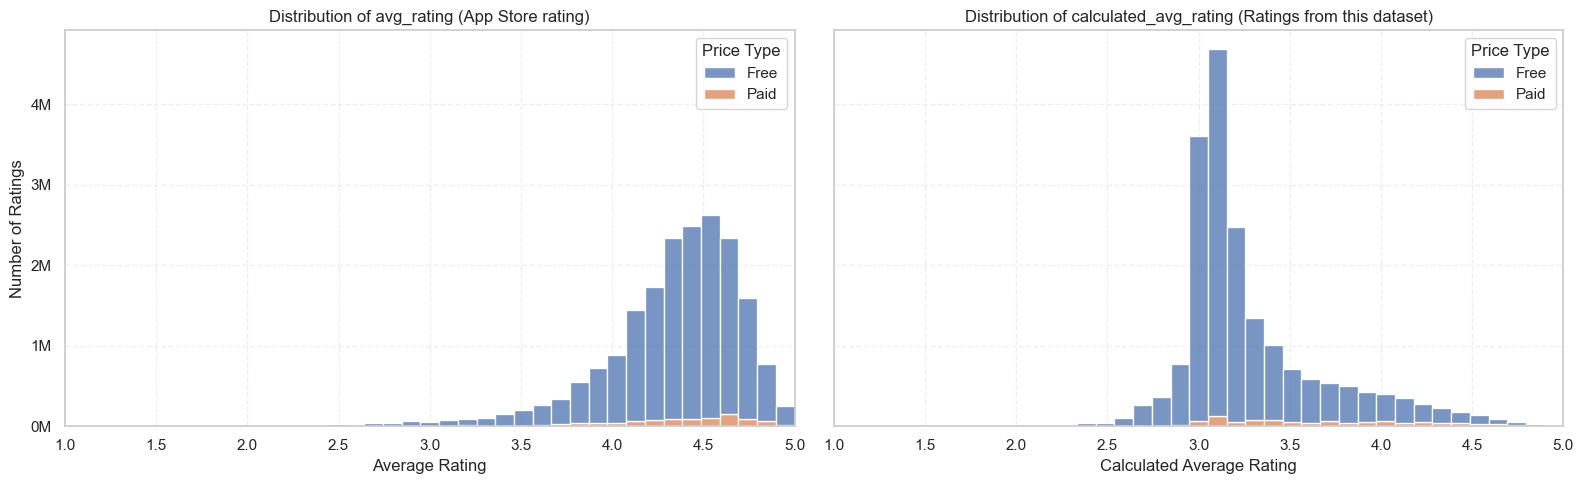

In [47]:
sns.set(style="whitegrid")

df["Price Type"] = df["price_type"]

bin_edges = np.linspace(1, 5, 40)

x_min = 1
x_max = 5
x_ticks = np.arange(1.0, 5.01, 0.5)

fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

sns.histplot(data=df, x="avg_rating", bins=bin_edges, hue="Price Type", multiple="stack", ax=axes[0])
axes[0].set_title("Distribution of avg_rating (App Store rating)")
axes[0].set_xlabel("Average Rating")
axes[0].set_ylabel("Number of Ratings")
axes[0].grid(True, linestyle='--', alpha=0.3)
axes[0].set_xlim(x_min, x_max)
axes[0].set_xticks(x_ticks)

sns.histplot(data=df, x="calculated_avg_rating", bins=bin_edges, hue="Price Type", multiple="stack", ax=axes[1])
axes[1].set_title("Distribution of calculated_avg_rating (Ratings from this dataset)")
axes[1].set_xlabel("Calculated Average Rating")
axes[1].grid(True, linestyle='--', alpha=0.3)
axes[1].set_xlim(x_min, x_max)
axes[1].set_xticks(x_ticks)

formatter = mticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.0f}M')
for ax in axes:
    ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

---
---
### Are app ratings evenly distributed, or do users show extreme bias?

- #### What we compare:
    - Distribution of 1–5 star ratings from **active users**.
    - Price Type split: **Free vs Paid**.

- #### Key observations & interpretation:
    - **5-star ratings dominate** the dataset with **6.1M+ reviews**, showing strong positive sentiment.
    - **1-star ratings are the second most common** (~4M), suggesting that users tend to rate apps only when they're either **extremely satisfied or extremely dissatisfied**.
    - Ratings of **2, 3, and 4 stars** are **comparatively rare**, especially 2-star - indicating **middle-ground feedback is uncommon**.
    - For every rating score, **Free apps account for the overwhelming majority (93–97%)** of reviews.
    - However, **Paid apps represent 7% of 5-star ratings**, a higher proportion than at any lower score (3–5%). This hints at **more favorable bias among paying users**.
    - Possible explanations for the 5-star dominance among Paid apps include:
        - Higher product quality,
        - More loyal or engaged users,
        - Or **post-purchase rationalization**, where users justify the cost by rating positively.

### Strategic Recommendations based on this analysis

- 1. **Don’t rely on average rating alone.** Track **rating distributions** to detect emotional volatility. High 1★ + 5★ = polarized users.
- 2. **Analyze and respond to extreme reviews.** 1 reviews often point to **friction or bugs**; 5★ may reveal **top features** driving satisfaction.
- 3. **Treat 2–3 star reviews as a goldmine.** They're rare, but often contain **constructive feedback** — these users aren’t angry, they’re trying to help.
- 4. **Use price segmentation in sentiment analysis.** Paid users are **more likely to rate positively**, but also **expect higher quality**. Track these segments separately.

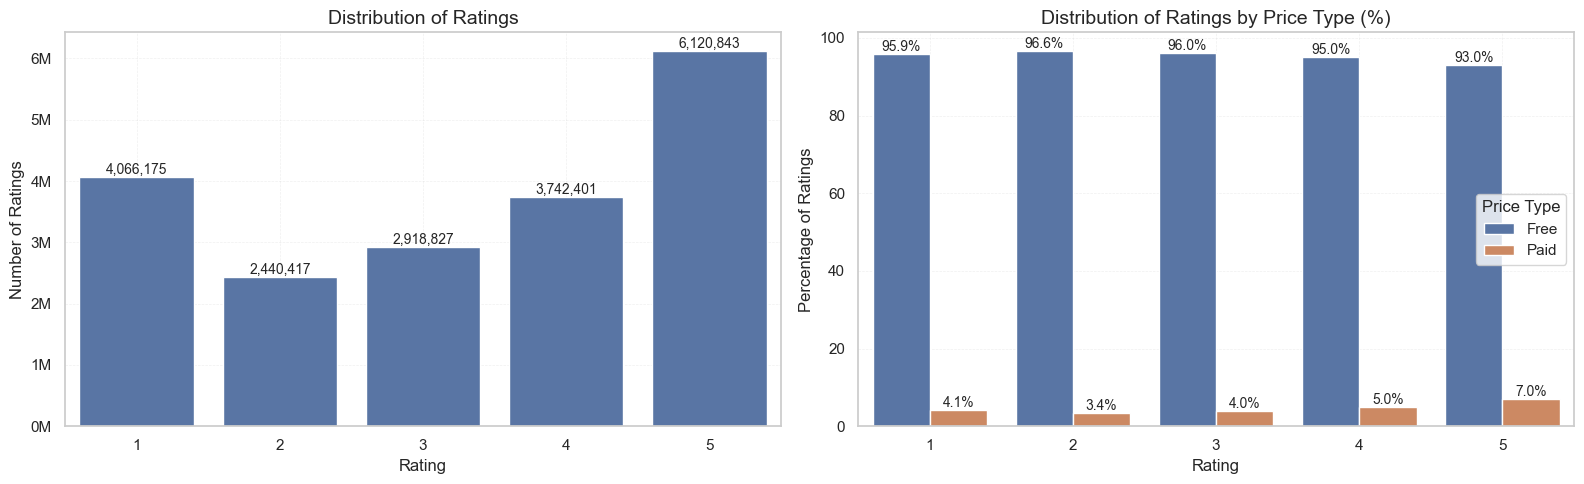

In [49]:
sns.set(style="whitegrid")

rating_price_counts = df.groupby(["rating", "price_type"], observed=True).size().reset_index(name="count")
rating_totals = rating_price_counts.groupby("rating")["count"].transform("sum")
rating_price_counts["pct"] = (rating_price_counts["count"] / rating_totals) * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

ax1 = axes[0]
sns.countplot(
    data=df,
    x="rating",
    order=sorted(df["rating"].unique()),
    ax=ax1
)

for bar in ax1.patches:
    height = int(bar.get_height())
    ax1.annotate(
        f'{height:,}', 
        xy=(bar.get_x() + bar.get_width() / 2, height),
        ha='center', va='bottom',
        fontsize=10
    )

ax1.set_title("Distribution of Ratings", fontsize=14)
ax1.set_xlabel("Rating", fontsize=12)
ax1.set_ylabel("Number of Ratings", fontsize=12)
ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x / 1_000_000)}M'))

ax2 = axes[1]
sns.barplot(
    data=rating_price_counts,
    x="rating",
    y="pct",
    hue="price_type",
    ax=ax2
)

for bar in ax2.patches:
    height = bar.get_height()
    if height > 0:
        ax2.annotate(
            f"{height:.1f}%",
            xy=(bar.get_x() + bar.get_width() / 2, height),
            ha="center", va="bottom", fontsize=10
        )

ax2.set_title("Distribution of Ratings by Price Type (%)", fontsize=14)
ax2.set_xlabel("Rating", fontsize=12)
ax2.set_ylabel("Percentage of Ratings", fontsize=12)
ax2.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
ax2.legend(title="Price Type")

plt.tight_layout()
plt.show()

---
---
### 📊 Does the distribution of ratings change across different app categories?

- #### We compare:
    - The distribution of `calculated_avg_rating` (from highly active users) across all app categories.
    - Split by **Free vs. Paid** apps.

- #### Key observations & interpretation:
    - Most categories exhibit a **right-skewed** distribution centered around a 3.0 rating, indicating that while extreme ratings are rare, they skew high rather than low.
    - **Paid apps** typically receive **fewer ratings** but show **slightly higher peaks**, especially in mission-critical categories like Medical, Education, and Productivity — suggesting that paying users tend to be more satisfied.
    - Categories such as **Weather, Parenting, Medical, and Educational** lean toward higher satisfaction bands (4.0–4.5), showing better product-market fit or stronger quality control.
    - On the other hand, **Entertainment, Arcade, and Trivia** show wider dispersion or polarization, which often signals uneven quality, novelty-driven experiences, or inconsistent UX.
    - The only category where **Free apps outperform Paid** is **Trivia** (+0.02 difference), showing that monetization doesn’t always bring improvement — although this is the exception, not the rule.
    - The **largest average uplift** from Free to Paid is seen in **Comics (+1.55)**, **Food & Drink (+1.24)**, and **Finance (+1.07)** — these verticals benefit most from monetization, either due to user expectations or superior offerings.
    - **Free apps** with the highest inconsistency (standard deviation) include **Parenting, Trivia, and Beauty**, suggesting fragmented user experiences or unmet expectations.
    - Among **Paid apps**, the most inconsistent categories are **Tools, Productivity, and Sports**, indicating that even paid products can suffer from poor quality alignment.
    - Four categories have **no paid apps at all**: **Events, House & Home, Dating, Shopping** — hinting at ad-supported or non-viable monetization models in these segments.

- #### Strategic Recommendations based on this analysis
    - 1. **Benchmark rating expectations by segment.** A 3.8 in Paid Productivity is weak; the same in Free Music might be excellent — context matters.
    - 2. **Monetize where uplift is proven.** Focus monetization in Comics, Food & Drink, and Finance — categories where Paid apps see >1.0 rating improvement.
    - 3. **Track rating variability to detect UX misalignment.** High standard deviation = inconsistent app quality; prioritize UX audits in segments like Parenting or Tools.
    - 4. **Avoid forcing monetization in low-ROI categories.** Some segments (e.g., Shopping, Dating) show no Paid apps — freemium or ad models may be more viable.

Legend:
Free - Blue
Paid - Orange


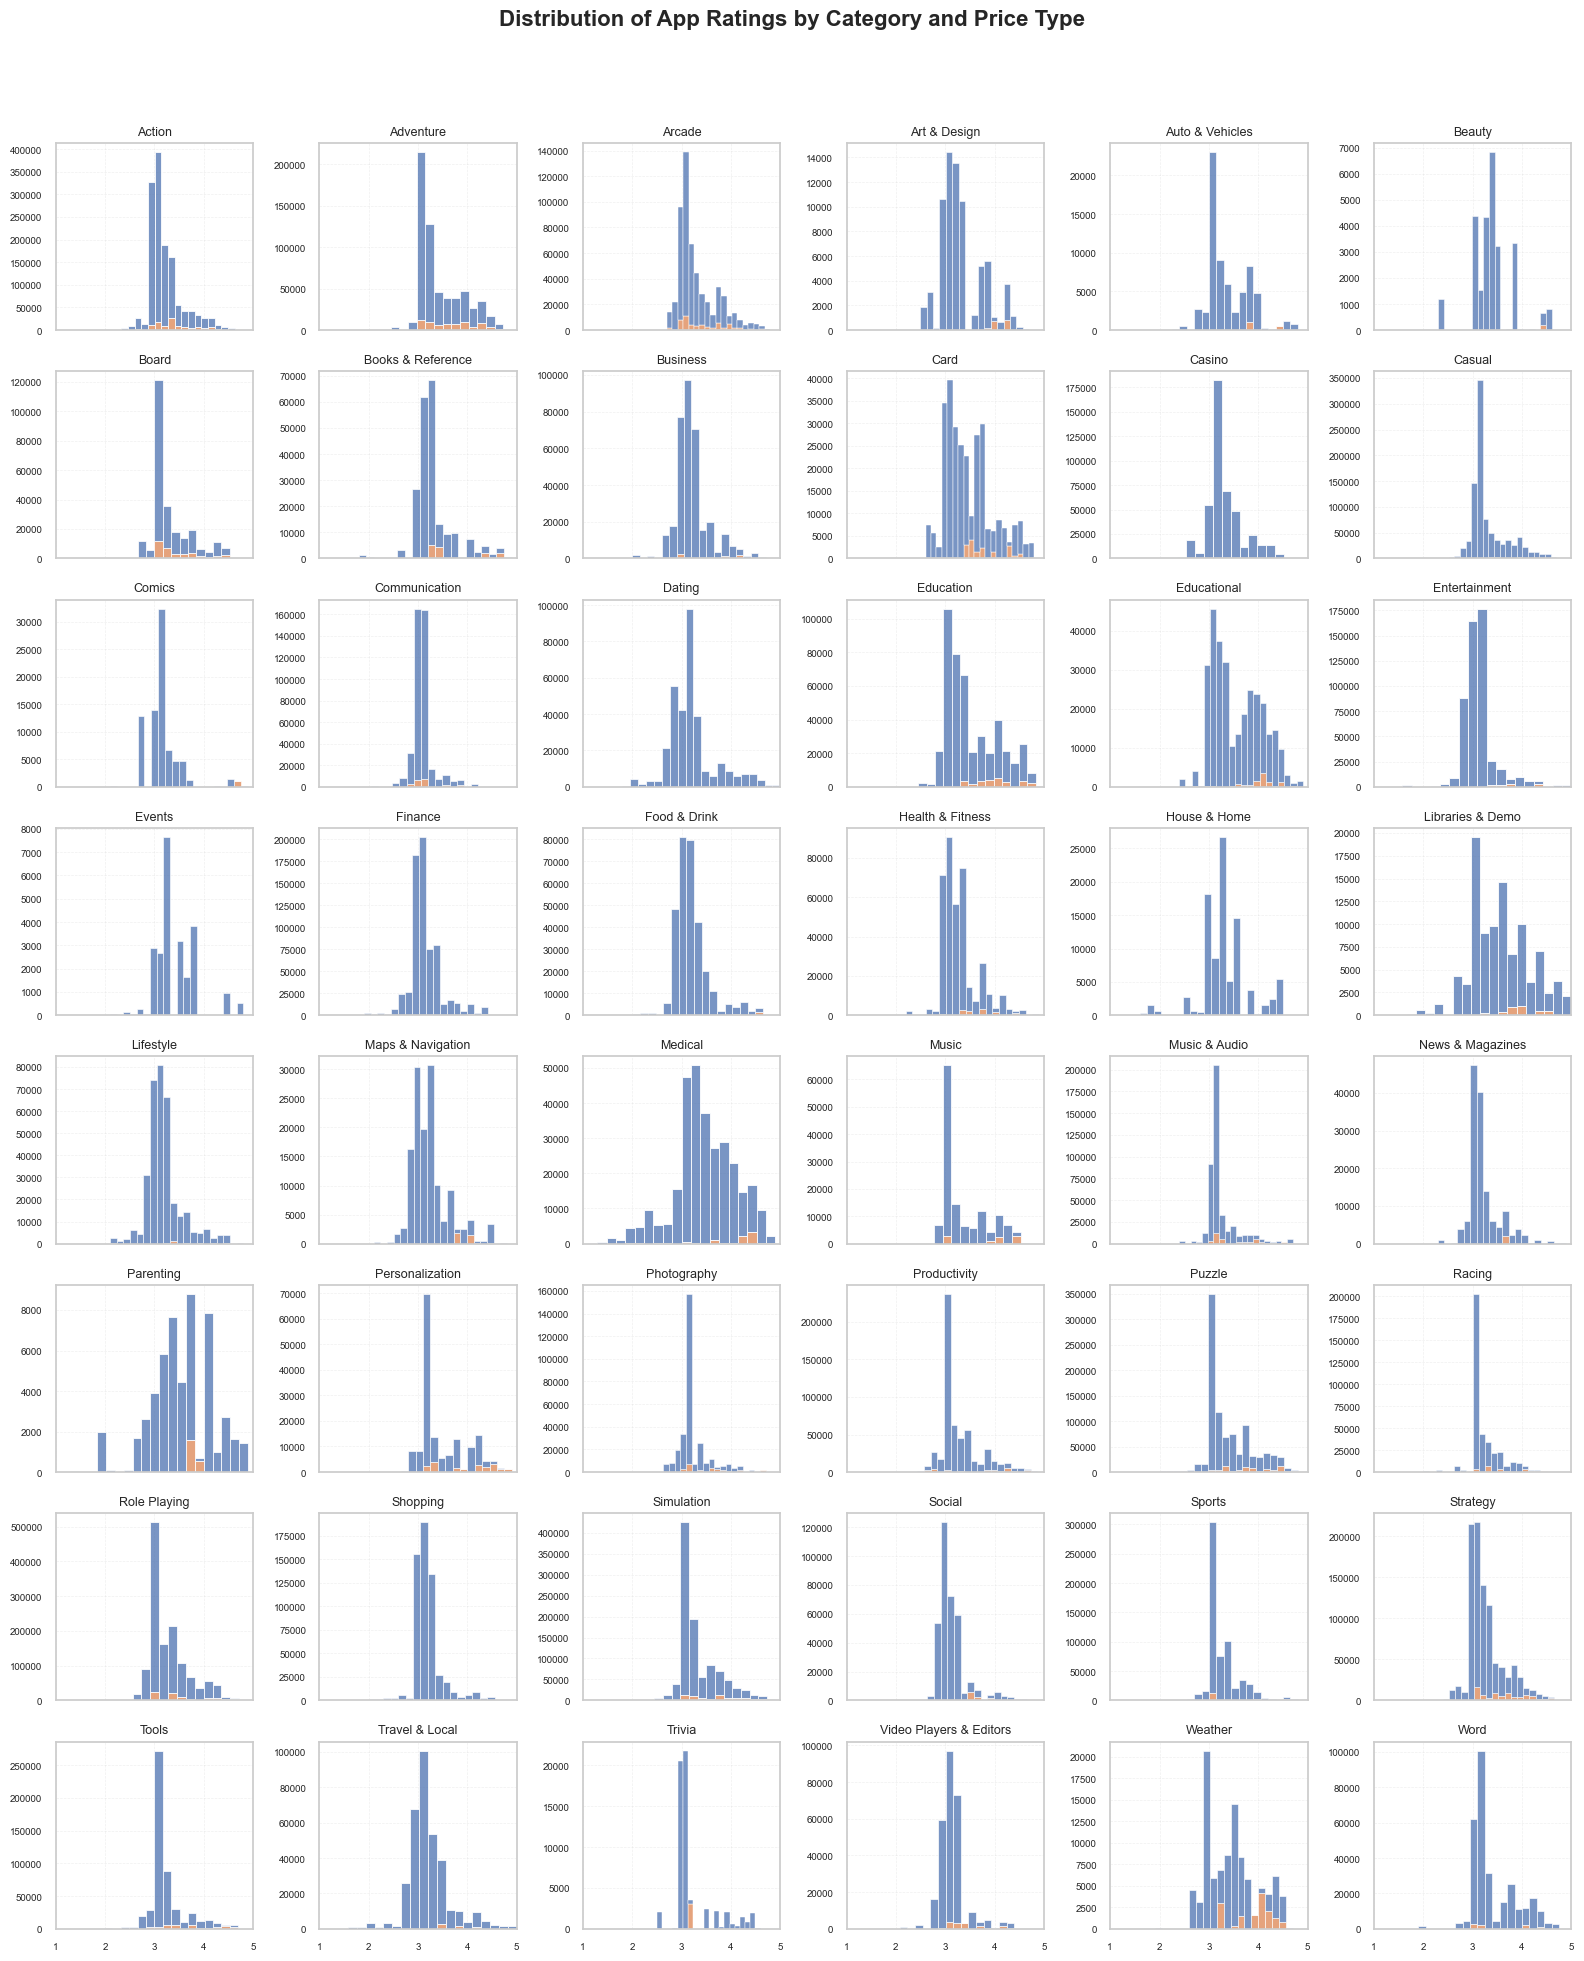

In [50]:
print("Legend:\nFree - Blue\nPaid - Orange")
sns.set(style="whitegrid")

categories = sorted(df['app_category'].dropna().unique())

n_rows, n_cols = 8, 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 20), sharex=True)
axes = axes.flatten()

for i, category in enumerate(categories):
    ax = axes[i]
    subset = df[df['app_category'] == category]
    
    sns.histplot(
        data=subset,
        x='calculated_avg_rating',
        bins=20,
        hue='price_type',
        multiple='stack',
        ax=ax
    )
    
    ax.set_title(category, fontsize=9)
    ax.set_xlim(1, 5)
    ax.set_xticks([1, 2, 3, 4, 5])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', labelsize=7)
    ax.tick_params(axis='y', labelsize=7)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)

    if ax.get_legend() is not None:
        ax.legend_.remove()

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Distribution of App Ratings by Category and Price Type", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for the title
plt.show()

---
---
### How Does Price Influence App Ratings and User Sentiment?

- #### We compare:
    - Rating distributions across **4 price tiers**: `Free`, `$0.01–4.99`, `$5.00–9.99`, and `$10.00+`.
    - Metrics include **average**, **min**, **max**, and **standard deviation** of ratings.
    - Distribution charts show **how rating behavior varies across price points**.

- #### Key observations & interpretation:
    - **Free apps** dominate in volume (18M+), but they have the **lowest average rating** at **3.26**, with more uniform behavior and a narrower distribution — fewer extremes in sentiment.
    - Apps in the **10.00+** range, despite being the least common (52K), show the **highest average rating (3.67)** and the **highest standard deviation (0.56)** — users either love them or are disappointed.
    - The **$0.01–4.99** tier strikes an effective balance — with a strong average rating (3.66) and moderate variability, it's a clear sweet spot for positive user sentiment and value delivery.
    - **Ratings improve with price**, suggesting a psychological or quality-based link: users who pay expect more but may also value the product more post-purchase.
    - The increasing **standard deviation with price** indicates **polarized sentiment** — higher-priced apps are higher risk and higher reward from the user's perspective.

- #### Strategic Recommendations based on this analysis
    - 1. **Target mid-price tiers ($0.99–4.99) for monetization.** This range offers near-maximum user satisfaction with lower risk of backlash compared to premium pricing.
    - 2. **Justify premium pricing with standout quality.** Apps in the 10+ range must deliver exceptional value to overcome user scrutiny and avoid rating volatility.
    - 3. **Monitor user feedback variance by price.** High standard deviation in expensive tiers signals the need for better onboarding, clearer value proposition, or expectation setting.
    - 4. **Position free apps for volume, not rating excellence.** Focus on reach, upsells, or ads — not 5-star ratings — when competing in the saturated free market.

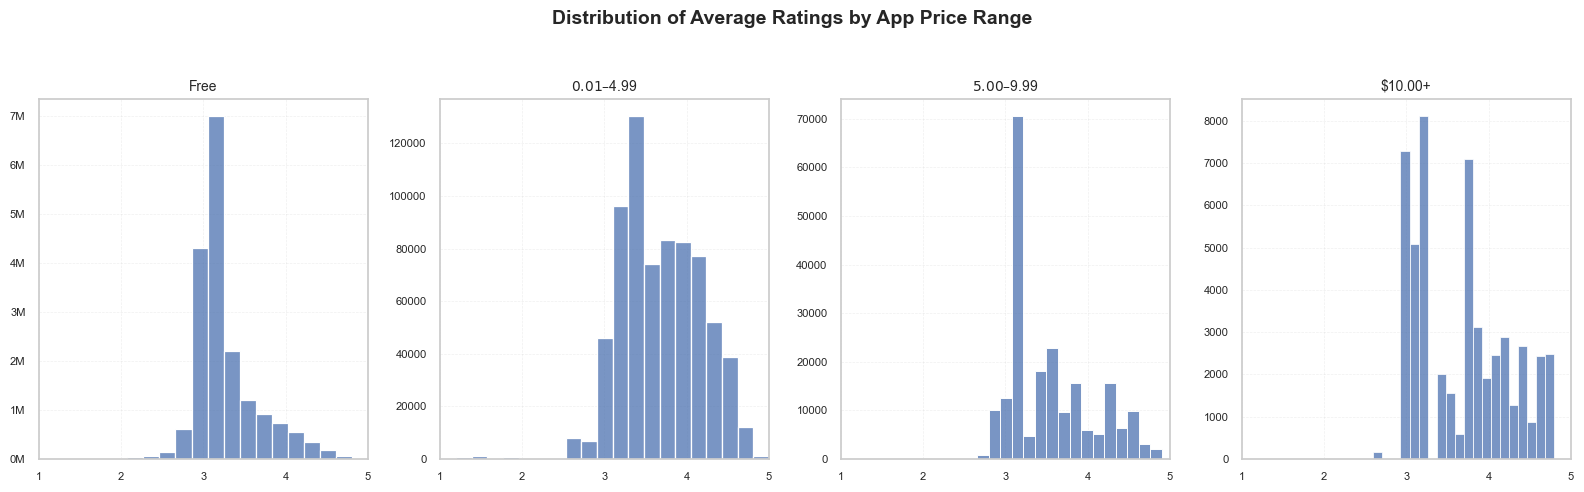

In [52]:
sns.set(style="whitegrid")

ordered_price_ranges = ['Free', '$0.01–$4.99', '$5.00–$9.99', '$10.00+']

df_filtered = df[df['price_range'].isin(ordered_price_ranges)]

n_rows, n_cols = 1, len(ordered_price_ranges)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 5), sharex=True)
if n_cols == 1:
    axes = [axes]

for i, price in enumerate(ordered_price_ranges):
    ax = axes[i]
    subset = df_filtered[df_filtered['price_range'] == price]

    sns.histplot(
        data=subset,
        x='calculated_avg_rating',
        bins=20,
        kde=False,
        ax=ax
    )

    ax.set_title(price, fontsize=10)
    ax.set_xlim(1, 5)
    ax.set_xticks([1, 2, 3, 4, 5])
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.set_xlabel('')
    ax.set_ylabel('')

    if price == 'Free':
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x / 1_000_000)}M'))

    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)

fig.suptitle("Distribution of Average Ratings by App Price Range", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

---
---
### How Do App Ratings Vary by Content Age Group and Price Type?

- #### We compare:
    - The distribution of calculated average ratings for apps across 5 content ratings:  
      `Adults only 18+`, `Everyone`, `Everyone 10+`, `Mature 17+`, and `Teen`.
    - Average rating, standard deviation, and app count for both **Free** and **Paid** versions within each group.


- #### Key Observations:
    - **Paid apps consistently outperform free apps in average rating** across all content ratings (e.g., +0.42 for "Everyone").
    - **Standard deviation is slightly higher for paid apps**, suggesting more varied experiences.
    - **Free apps dominate in quantity**, especially in "Everyone" (11.4M free vs. 0.56M paid).
    - The **difference in average rating** is largest for `"Everyone"` and `"Teen"` segments.


- #### Interpretation:
    - Paid apps likely invest more in quality, leading to **higher satisfaction scores**.
    - The higher standard deviation for paid apps may indicate **polarized feedback** (users have high expectations).
    - Categories with fewer paid apps (like `"Teen"` or `"Mature 17+"`) still show consistent rating advantage, implying price may signal quality even with fewer entries.

- #### Why this matters:
    - **Freemium models** should be cautious: low ratings on free apps can hurt brand perception.
    - When targeting `"Everyone"` or `"Teen"` markets, offering a **premium paid tier** could yield better reviews.
    - App developers can use this insight to **position and price apps strategically** based on content rating demographics.

Legend:
Free - Blue
Paid - Orange


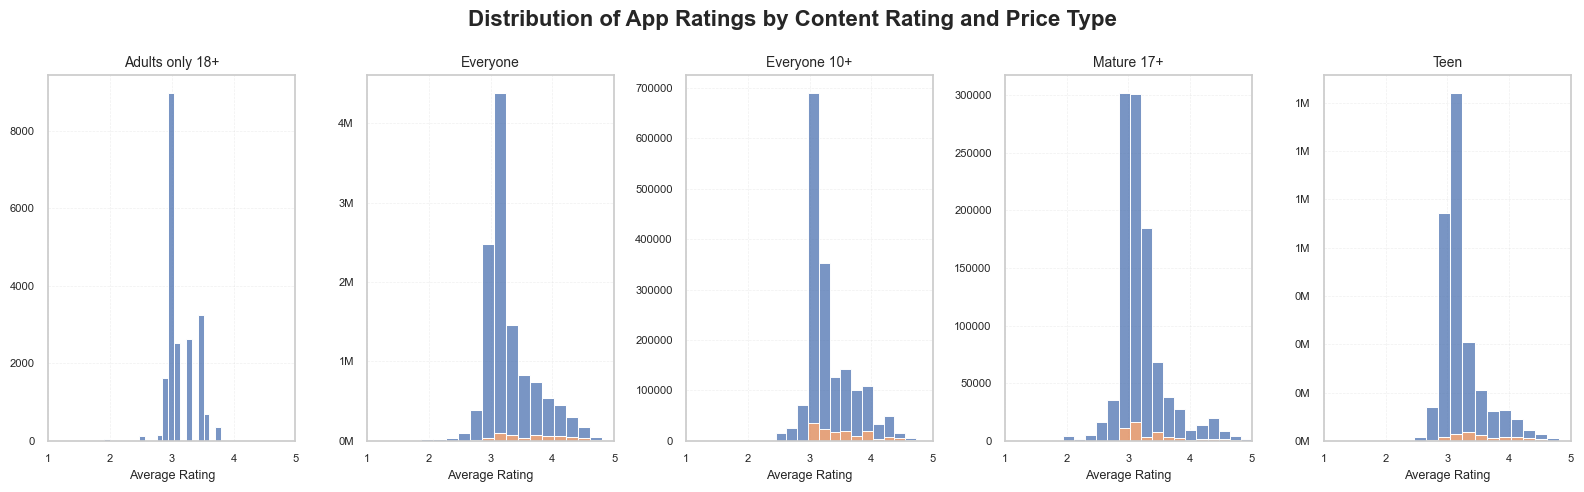

In [53]:
print("Legend:\nFree - Blue\nPaid - Orange")
sns.set(style="whitegrid")

content_ratings = sorted(df['content_rating'].dropna().unique())

n_rows, n_cols = 1, 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5), sharex=True)
axes = axes.flatten()

for i, rating in enumerate(content_ratings):
    ax = axes[i]
    subset = df[df['content_rating'] == rating]
    
    sns.histplot(
        data=subset,
        x='calculated_avg_rating',
        bins=20,
        hue='price_type',
        multiple='stack',
        ax=ax
    )
    
    ax.set_title(rating, fontsize=10)
    ax.set_xlim(1, 5)
    ax.set_xticks([1, 2, 3, 4, 5])
    ax.set_xlabel('Average Rating', fontsize=9)
    ax.set_ylabel('')
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)

    if rating in ["Everyone", "Teen"]:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1_000_000)}M'))

    if ax.get_legend() is not None:
        ax.legend_.remove()

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Distribution of App Ratings by Content Rating and Price Type", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

---
---
### Do User Ratings Become More Extreme (Good/Bad) as Apps Age?

- #### What We Analyzed
    - We investigated how app age correlates with:
        - Average rating
        - Share of extreme ratings (1-star and 5-star)
        - Rating variability (standard deviation)
        - Differences between free and paid apps

- #### Key observations & interpretation:
    - **Newer apps receive the highest ratings**: Apps younger than 6 months average 3.46 stars overall, with paid versions reaching up to 3.80.
    - **Ratings steadily decline with age**: Apps older than 5 years show the lowest average ratings — 2.95 overall, 2.86 for free apps, 3.25 for paid.
    - **Younger apps trigger stronger emotions**: Apps <6m old show the highest percentage of 5-star ratings (41%) and a very high percentage of 1-star ratings (22%).
    - **Older apps receive more moderate feedback**: The share of extreme ratings (1★ and 5★) drops with age, while ratings become more centered around the mean.
    - **Standard deviation decreases with age**: From 1.60 (<6m) to 1.31 (5y+), indicating that user sentiment becomes more stable over time.
    - **Paid apps consistently outperform free apps in ratings** across all age groups, though the standard deviation remains similar between them.

- #### Strategic Recommendations based on this analysis
    - 1. **Polish the product before launch.** Early bugs can lead to 1★ reviews that permanently drag down long-term rating averages.
    - 2. **Treat the first 6 months as a high-volatility zone.** Invest in onboarding, education, and immediate bug-fixes to prevent early backlash.
    - 3. **Monitor early reviews for extreme signals.** High percentages of 1★ or 5★ indicate unmet expectations or delight — act fast on either.
    - 4. **Benchmark apps by age, not only by category.** A 3.2 rating might be excellent at 4 years old, but weak for a newly released app.

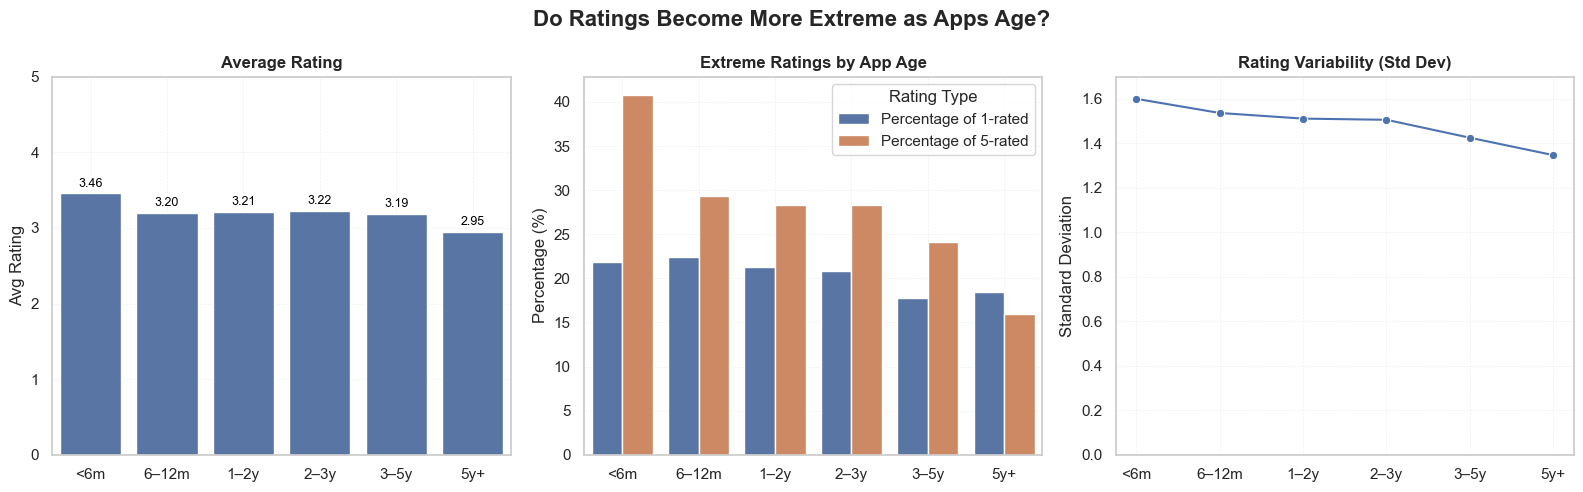

In [54]:
df['app_age_bin'] = pd.cut(
    df['app_age_days'],
    bins=[0, 180, 365, 730, 1095, 2000, df['app_age_days'].max()],
    labels=['<6m', '6–12m', '1–2y', '2–3y', '3–5y', '5y+'],
    include_lowest=True
)

age_summary = df.groupby('app_age_bin', observed=True)['rating'].agg(
    avg_rating='mean',
    std_rating='std',
    total_ratings='count',
    pct_1_star=lambda x: (x == 1).mean() * 100,
    pct_5_star=lambda x: (x == 5).mean() * 100
).reset_index()

age_summary_melt = age_summary.melt(
    id_vars='app_age_bin',
    value_vars=['pct_1_star', 'pct_5_star'],
    var_name='Rating Type',
    value_name='Percentage'
)

age_summary_melt['Rating Type'] = age_summary_melt['Rating Type'].map({
    'pct_1_star': 'Percentage of 1-rated',
    'pct_5_star': 'Percentage of 5-rated'
})

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.set(style="whitegrid")

sns.barplot(data=age_summary, x='app_age_bin', y='avg_rating', ax=axes[0])
axes[0].set_title("Average Rating", fontsize=12, fontweight='bold')
axes[0].set_xlabel("")
axes[0].set_ylabel("Avg Rating")
axes[0].set_ylim(0, 5)
axes[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.3)

for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.05,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

sns.barplot(data=age_summary_melt, x='app_age_bin', y='Percentage', hue='Rating Type', ax=axes[1])
axes[1].set_title("Extreme Ratings by App Age", fontsize=12, fontweight='bold')
axes[1].set_xlabel("")
axes[1].set_ylabel("Percentage (%)")
axes[1].legend(title="Rating Type")
axes[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.3)

sns.lineplot(data=age_summary, x='app_age_bin', y='std_rating', marker='o', ax=axes[2])
axes[2].set_title("Rating Variability (Std Dev)", fontsize=12, fontweight='bold')
axes[2].set_xlabel("")
axes[2].set_ylabel("Standard Deviation")
axes[2].set_ylim(0, age_summary['std_rating'].max() + 0.1)
axes[2].grid(True, linestyle='--', linewidth=0.5, alpha=0.3)

fig.suptitle("Do Ratings Become More Extreme as Apps Age?", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

---
---
### Do Users Feel Misled? Measuring Sentiment Divergence Across App Categories

- #### What We Analyzed  
    - Filtered to English reviews only (excluding low-confidence and short reviews).  
    - Calculated **sentiment divergence**: the absolute difference between a review’s `rating` and the app’s `calculated_avg_rating`.  
    - Grouped by `app_category` to compute average divergence per category.  

- #### Key observations & interpretation:
    - **Dating apps show the highest sentiment divergence**: individual ratings vary widely from the app’s average — users either love or hate them.
    - **Events, Travel, Maps, and Casino categories** also rank high, suggesting **unstable or inconsistent user experiences**.
    - **High divergence reflects volatile user sentiment**, possibly due to performance issues, overpromising, or clashing expectations.
    - **Low divergence often signals mature, well-scoped apps**, where expectations are better aligned with user experience.

- #### Strategic Recommendations based on this analysis
    - 1. **Prioritize usability QA in high-divergence categories.** Dating, Events, and Travel apps require rigorous UX and reliability testing.
    - 2. **Use divergence as an early risk metric.** Sudden spikes in divergence may flag hidden issues or misaligned expectations.
    - 3. **Dig into review content for high-divergence categories.** Apply topic modeling to uncover recurring frustration or confusion themes.
    - 4. **Benchmark marketing messaging against actual reviews.** High divergence might stem from app descriptions overpromising features.
    - 5. **Study low-divergence categories as models for consistency.** These apps may offer design, support, or onboarding strategies worth replicating.


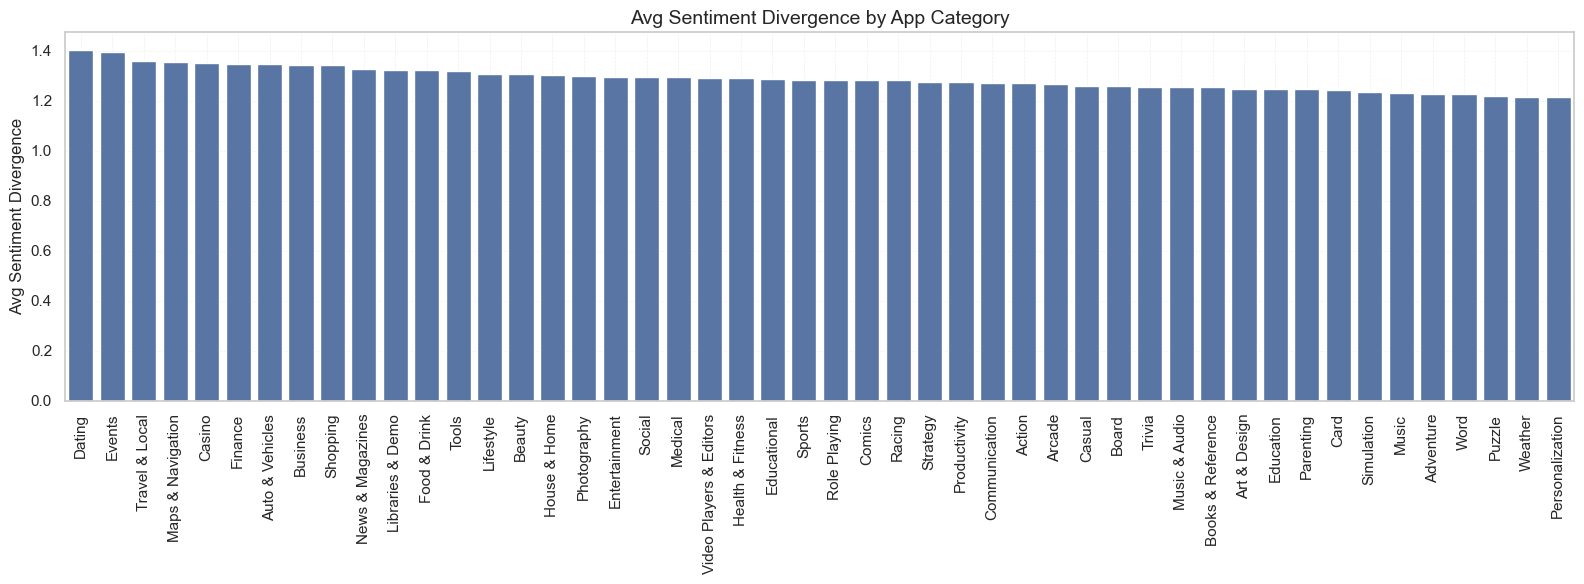

In [55]:
df_en = df[df['review_lang'] == 'en'].copy()

df_en['sentiment_divergence'] = abs(df_en['rating'] - df_en['calculated_avg_rating'])

cat_div = df_en.groupby('app_category', observed=True, as_index=False)['sentiment_divergence'] \
               .mean().sort_values(by='sentiment_divergence', ascending=False)

sorted_categories = cat_div['app_category']

plt.figure(figsize=(16, 6))
ax = sns.barplot(
    data=cat_div,
    x='app_category',
    y='sentiment_divergence',
    order=sorted_categories
)

ax.set_title("Avg Sentiment Divergence by App Category", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Avg Sentiment Divergence", fontsize=12)
ax.tick_params(axis='x', rotation=90)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

---
---
## **Final Thoughts & Conclusions: Mobile App Rating Analysis**

### **Key Insights**

- **Newer apps get higher but more extreme ratings.**  
  Users are more emotionally reactive early on (e.g., bugs, excitement).  
  Early reviews strongly influence long-term averages.
  
- **Older apps receive more moderate and stable ratings.**  
  Standard deviation in ratings decreases with age.  
  Suggests that apps evolve toward more consistent user experiences over time.

- **Paid apps outperform free ones across all age groups.**  
  Indicates stronger user satisfaction when money is exchanged, possibly due to better support or expectations.

- **Certain app categories show significantly higher sentiment divergence.**  
  Some categories (e.g., social, finance, dating) have **higher disagreement** between individual ratings and average ratings - suggesting **polarizing experiences**.

---

### **Final Strategic Recommendations**

- **1. Benchmark Ratings by Age.**  
  Don’t treat a 3.2 rating equally across all apps - it could be excellent for a 5-year-old app but weak for a new one.

- **2. Focus on Stability Over Time.**  
  Apps should aim not just for high ratings, but for **low variance** - meaning reliable, predictable user satisfaction.

- **3. Monitor Divergence as a Risk Signal.**  
  High divergence within an app’s reviews might indicate **unmet expectations**, controversial updates, or unclear UX.

- **4. Treat 1-Star Reviews as Gold for Prioritization.**  
  They’re often emotionally charged but thematically consistent.

- **5. Prioritize Onboarding for First 6 Months.**  
  Most emotional (positive or negative) reactions come early - fix bugs, educate users, and monitor closely.